# Classification des Tweets

## 1.Prétraitement des tweets

In [9]:
import pandas as pd
import re
import string
# Charger le fichier CSV
df = pd.read_csv("sentiment140.csv", encoding="latin1", header=None)
df.columns = ["target", "id", "date", "flag", "user", "text"]
def clean_tweet(tweet):
    # 1. Supprimer les mentions (@username)
    tweet = re.sub(r'@\w+', '', tweet)
    
    # 2. Supprimer les hashtags (#)
    tweet = re.sub(r'#', '', tweet)
    
    # 3. Supprimer les URLs
    tweet = re.sub(r'http\S+', '', tweet)
    
    # 4. Supprimer les emojis (en utilisant un pattern pour détecter les emojis)
    tweet = re.sub(r'[^\x00-\x7F]+', '', tweet)  # Supprime les caractères non-ASCII (emojis)
    
    # 5. Supprimer la ponctuation
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    
    # 6. Convertir tout le texte en minuscules
    tweet = tweet.lower()
    return tweet

In [10]:
# Appliquer le nettoyage sur le premier tweet de votre dataset
sample_tweet = df["text"].iloc[0]  # Prenons le premier tweet pour l'exemple
cleaned_tweet = clean_tweet(sample_tweet)

# Si vous voulez nettoyer tout le dataset, appliquez-le à la colonne 'text'
df['cleaned_text'] = df['text'].apply(clean_tweet)

# Afficher les 5 premières lignes du dataset après nettoyage
print("\nDataset après nettoyage:")
print(df[['text', 'cleaned_text']].head())


Dataset après nettoyage:
                                                text  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  is upset that he can't update his Facebook by ...   
2  @Kenichan I dived many times for the ball. Man...   
3    my whole body feels itchy and like its on fire    
4  @nationwideclass no, it's not behaving at all....   

                                        cleaned_text  
0     awww thats a bummer  you shoulda got david ...  
1  is upset that he cant update his facebook by t...  
2   i dived many times for the ball managed to sa...  
3    my whole body feels itchy and like its on fire   
4   no its not behaving at all im mad why am i he...  


In [11]:
# Créer un tableau coloré pour les 10 premiers tweets
df.head(10).style.applymap(lambda x: 'background-color: #f2f2f2' if isinstance(x, str) else '')


C:\Users\Client\AppData\Local\Temp\ipykernel_14740\4032960744.py:2: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  df.head(10).style.applymap(lambda x: 'background-color: #f2f2f2' if isinstance(x, str) else '')


,target,id,date,flag,user,text,cleaned_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",awww thats a bummer you shoulda got david carr of third day to do it d
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,is upset that he cant update his facebook by texting it and might cry as a result school today also blah
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,i dived many times for the ball managed to save 50 the rest go out of bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",no its not behaving at all im mad why am i here because i cant see you all over there
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug,need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,"@LOLTrish hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ?",hey long time no see yes rains a bit only a bit lol im fine thanks hows you
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it,nope they didnt have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?,que me muera


## 2.Analyse NLP avec NLTK

importer les modules nécessaires

In [14]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
#imports pour nlp


téléchargé les ressources nécessaires dans NLTK pour la tokenisation, les stopwords, et la lemmatisation :

In [16]:
nltk.download('punkt')  # Pour la tokenisation
nltk.download('stopwords')  # Pour les stopwords
nltk.download('wordnet')  # Pour la lemmatisation


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Client\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Client\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Client\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Tokenisation (Découper le texte en mots)

La tokenisation consiste à découper le texte en mots individuels ou en tokens.

In [19]:
# Initialiser les outils de nettoyage
stop_words = set(stopwords.words('english'))  # Ou 'french' si vous travaillez avec des tweets en français
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

## 1.Tokenisation : La fonction word_tokenize() découpe le texte en mots (ou tokens).

## 2.Suppression des stopwords : On filtre les mots courants comme "the", "is", "and" qui n'apportent pas d’information utile pour l’analyse.

## 3.Stemming : Chaque mot est réduit à sa racine (ex. "running" → "run").

## 4.Lemmatisation : Réduction des mots à leur forme canonique (ex. "better" → "good").

In [23]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import string

# Télécharger les ressources NLTK nécessaires
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Charger le dataset sentiment140 (après nettoyage initial)
df = pd.read_csv("sentiment140.csv", encoding="latin1", header=None)
df.columns = ["target", "id", "date", "flag", "user", "text"]

# Nettoyage initial (supprimer les mentions, hashtags, URLs, emojis, ponctuation et convertir en minuscules)
def clean_tweet(tweet):
    # Supprimer les mentions @username
    tweet = re.sub(r'@\w+', '', tweet)
    
    # Supprimer les hashtags #
    tweet = re.sub(r'#', '', tweet)
    
    # Supprimer les URLs
    tweet = re.sub(r'http\S+', '', tweet)
    
    # Supprimer les emojis (caractères non-ASCII)
    tweet = re.sub(r'[^\x00-\x7F]+', '', tweet)  # Supprime les caractères non-ASCII (emojis)
    
    # Supprimer la ponctuation
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    
    # Convertir tout le texte en minuscules
    tweet = tweet.lower()
    
    return tweet

# Appliquer le nettoyage initial à chaque tweet
df['cleaned_text'] = df['text'].apply(clean_tweet)

# Initialiser les outils de nettoyage NLP
stop_words = set(stopwords.words('english'))  # Vous pouvez utiliser 'french' si les tweets sont en français
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Fonction de prétraitement NLP : tokenisation, suppression des stopwords, stemming et lemmatisation
def preprocess_tweet(tweet):
    # Tokenisation
    tokens = word_tokenize(tweet)
    
    # Suppression des stopwords
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Stemming
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    
    # Lemmatisation
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]
    
    return " ".join(lemmatized_tokens)  # Joindre les tokens traités en une seule chaîne de texte

# Appliquer le prétraitement à chaque tweet nettoyé
df['processed_text'] = df['cleaned_text'].apply(preprocess_tweet)

# Afficher les 5 premiers tweets avant et après prétraitement
print(df[['text', 'cleaned_text', 'processed_text']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Client\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Client\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Client\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                text  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  is upset that he can't update his Facebook by ...   
2  @Kenichan I dived many times for the ball. Man...   
3    my whole body feels itchy and like its on fire    
4  @nationwideclass no, it's not behaving at all....   

                                        cleaned_text  \
0     awww thats a bummer  you shoulda got david ...   
1  is upset that he cant update his facebook by t...   
2   i dived many times for the ball managed to sa...   
3    my whole body feels itchy and like its on fire    
4   no its not behaving at all im mad why am i he...   

                                      processed_text  
0  awww that bummer shoulda got david carr third day  
1  upset cant updat facebook text might cri resul...  
2    dive mani time ball manag save 50 rest go bound  
3                    whole bodi feel itchi like fire  
4                              behav im mad cant se

# 1. Displaying the Data in a Table(original tweet, cleaned tweet, and processed tweet)

In [25]:
import IPython.display as display
from IPython.core.display import HTML

def display_colored_tweets(df):
    html = "<table style='width:100%; border-collapse: collapse;'>"
    html += "<tr><th style='text-align:left;'>Tweet Original</th><th style='text-align:left;'>Tweet Nettoyé</th><th style='text-align:left;'>Tweet Traitée</th></tr>"
    
    for index, row in df.iterrows():
        original_tweet = f"<td style='background-color: #f2f2f2; padding: 8px;'>{row['text']}</td>"
        cleaned_tweet = f"<td style='background-color: #e6ffe6; padding: 8px;'>{row['cleaned_text']}</td>"
        processed_tweet = f"<td style='background-color: #f0e68c; padding: 8px;'>{row['processed_text']}</td>"
        html += f"<tr>{original_tweet}{cleaned_tweet}{processed_tweet}</tr>"
    
    html += "</table>"
    display.display(HTML(html))

# Display the first 5 rows of the DataFrame in a table
display_colored_tweets(df.head())


Tweet Original,Tweet Nettoyé,Tweet Traitée
"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",awww thats a bummer you shoulda got david carr of third day to do it d,awww that bummer shoulda got david carr third day
is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,is upset that he cant update his facebook by texting it and might cry as a result school today also blah,upset cant updat facebook text might cri result school today also blah
@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,i dived many times for the ball managed to save 50 the rest go out of bounds,dive mani time ball manag save 50 rest go bound
my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",no its not behaving at all im mad why am i here because i cant see you all over there,behav im mad cant see


### Stemming (PorterStemmer):

The PorterStemmer algorithm used during the stemming process might reduce the word endings, and in some cases, this could result in the replacement of letters like "y" with "i". For example:
"happy" → "happi"
"cry" → "cri"

# 2. Length Comparison of Original vs. Cleaned and Processed Tweets

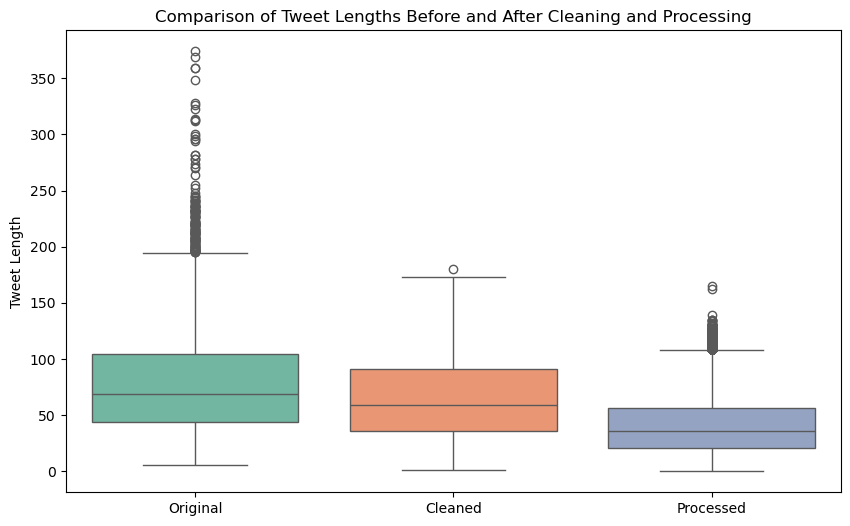

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate tweet lengths
df['original_length'] = df['text'].apply(len)
df['cleaned_length'] = df['cleaned_text'].apply(len)
df['processed_length'] = df['processed_text'].apply(len)

# Create a DataFrame to hold the lengths
length_df = pd.DataFrame({
    'Original': df['original_length'],
    'Cleaned': df['cleaned_length'],
    'Processed': df['processed_length']
})

# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=length_df, palette="Set2")
plt.title('Comparison of Tweet Lengths Before and After Cleaning and Processing')
plt.ylabel('Tweet Length')
plt.show()


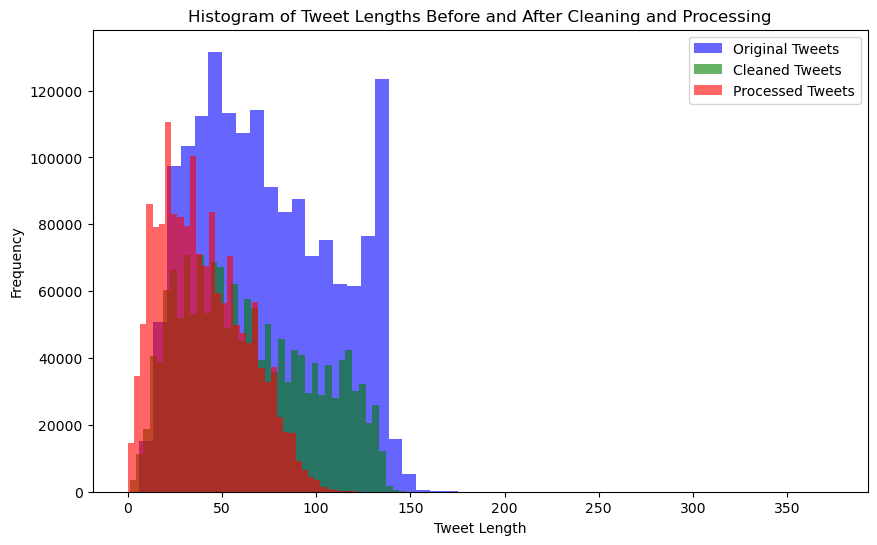

In [29]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['original_length'], bins=50, alpha=0.6, label='Original Tweets', color='blue')
plt.hist(df['cleaned_length'], bins=50, alpha=0.6, label='Cleaned Tweets', color='green')
plt.hist(df['processed_length'], bins=50, alpha=0.6, label='Processed Tweets', color='red')

# Set plot labels
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Histogram of Tweet Lengths Before and After Cleaning and Processing')
plt.legend()
plt.show()


plt.ylabel('Frequency'):

This sets the label for the y-axis, which shows the frequency (or count) of tweets that fall into each length bin. For example, it shows how many tweets have a length of 50 characters, 100 characters, and so on.

# Calcul de la Distance de Jaccard

#### mesure la similarité entre deux ensembles

d(tweet1​,tweet2​)=∣tweet1​∩tweet2​∣/∣tweet1​∪tweet2​∣​

Cela peut être appliqué en transformant les tweets en ensembles de mots, puis en calculant l’intersection et l’union de ces ensembles.

### Étape 1: Préparation des données (TF-IDF Vectorization)

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Utilisation de TF-IDF pour transformer les tweets en vecteurs
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)
X = vectorizer.fit_transform(df['processed_text'])

# Afficher les dimensions de la matrice TF-IDF (n_samples, n_features)
print(X.shape)  # (Nombre de tweets, Nombre de caractéristiques)


(1600000, 111383)


### Étape 2: Appliquer K-Means Clustering

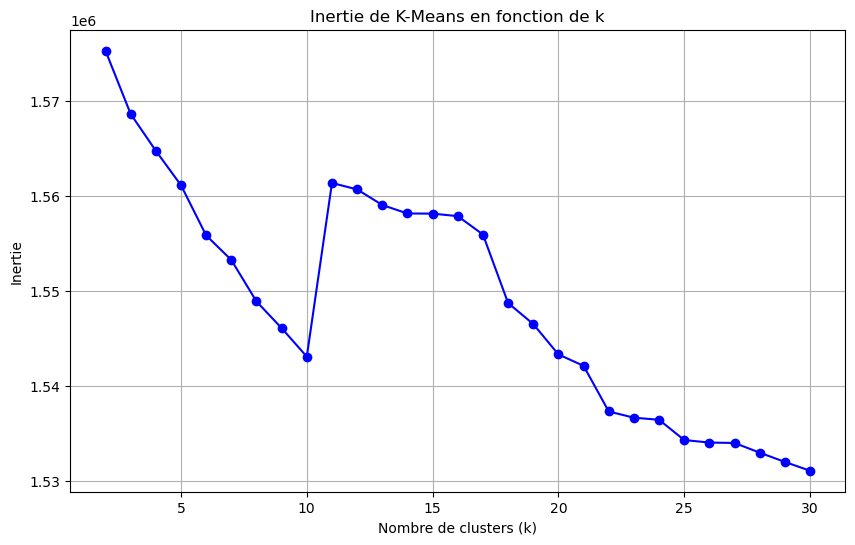

                                      processed_text  kmeans_cluster
0  awww that bummer shoulda got david carr third day               0
1  upset cant updat facebook text might cri resul...               4
2    dive mani time ball manag save 50 rest go bound               0
3                    whole bodi feel itchi like fire               3
4                              behav im mad cant see               2


In [37]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Essayer plusieurs valeurs de k (de 2 à 30)
k_range = range(2, 31)
inertia = []  # Liste pour stocker l'inertie pour chaque k

# Essai de K-Means pour différentes valeurs de k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Inertie = somme des distances au centre des clusters

# Tracer l'inertie en fonction de k pour choisir le bon k
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', color='blue')
plt.title('Inertie de K-Means en fonction de k')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.grid(True)
plt.show()

# Choisir un k (par exemple k=5) et appliquer K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X)

# Afficher les 5 premiers tweets avec leur cluster
print(df[['processed_text', 'kmeans_cluster']].head())


#### Explication :
TF-IDF transforme chaque tweet en un vecteur numérique, où chaque dimension représente l'importance d'un mot dans le tweet.
K-Means regroupe les tweets en k clusters. On essaie plusieurs valeurs de k pour choisir celle qui minimise l'inertie (distance intra-cluster).
Une fois que vous avez choisi k, vous appliquez K-Means et attribuez chaque tweet à un cluster

### Étape 3: Appliquer Fuzzy C-Means Clustering


In [40]:
pip install fuzzy-c-means


Note: you may need to restart the kernel to use updated packages.


In [41]:
# Réduire la taille du dataset pour éviter les MemoryError
df_sample = df.sample(n=10000, random_state=42)  # Prenez 10 000 tweets aléatoires



In [42]:
pip install pyclustering


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from pyclustering.cluster.fcm import fcm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import numpy as np
import matplotlib.pyplot as plt

# Échantillonner les données pour éviter les problèmes de mémoire
df_sample = df.sample(n=10000, random_state=42)  # Prenez un échantillon de 10 000 tweets

# Vectorisation des tweets (TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)
X = vectorizer.fit_transform(df['processed_text'])


# Réduction de la dimensionnalité
svd = TruncatedSVD(n_components=100, random_state=42)
X_dense = svd.fit_transform(X)

# Fonction pour initialiser aléatoirement les centres des clusters
def initialize_centers(data, k):
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices]

# Essayer plusieurs valeurs de k pour Fuzzy C-Means (de 2 à 30)
k_range = range(2, 31)
fcm_inertia = []  # Liste pour stocker l'inertie pour chaque k

for k in k_range:
    initial_centers = initialize_centers(X_dense, k)  # Générer des centres initiaux
    fcm_model = fcm(X_dense, initial_centers)  # Créer l'instance FCM avec les centres initiaux
    fcm_model.process()  # Appliquer l'algorithme FCM
    inertia = np.sum(fcm_model.get_membership())  # Calcul de l'inertie basée sur les affinités des points aux clusters
    fcm_inertia.append(inertia)  # Ajouter l'inertie à la liste

# Tracer l'inertie en fonction de k pour choisir le bon k
plt.figure(figsize=(10, 6))
plt.plot(k_range, fcm_inertia, marker='o', color='green')
plt.title('Inertie de Fuzzy C-Means en fonction de k')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie (Fuzzy C-Means)')
plt.grid(True)
plt.show()

# Choisir un k (par exemple k=5) et appliquer Fuzzy C-Means
k_optimal = 5  # Choisissez k en fonction de l'inertie
initial_centers = initialize_centers(X_dense, k_optimal)  # Centres initiaux pour k=5
fcm_model = fcm(X_dense, initial_centers)
fcm_model.process()

# Récupérer les labels de clusters flous
fcm_labels = fcm_model.get_clusters()

# Ajouter les résultats à votre dataframe
df_sample['fcm_cluster'] = -1  # Initialiser une colonne
for cluster_id, cluster_points in enumerate(fcm_labels):
    # Garder seulement les indices valides présents dans df_sample
    valid_points = [point for point in cluster_points if point in df_sample.index]
    df_sample.loc[valid_points, 'fcm_cluster'] = cluster_id

# Afficher les 5 premiers tweets avec leur cluster Fuzzy C-Means
print(df_sample[['processed_text', 'fcm_cluster']].head())


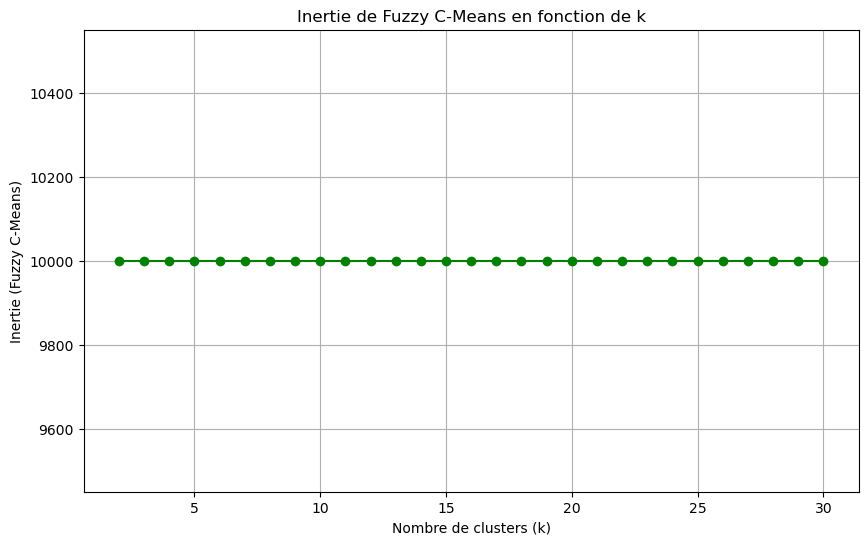

                                           processed_text  fcm_cluster
541200                                       ahhh hope ok           -1
750                                 cool tweet app razr 2            1
766711  know famili drama lamehey next time u hang kim...           -1
285055  school email wont open geographi stuff revis s...           -1
705995                               upper airway problem           -1


In [56]:
from pyclustering.cluster.fcm import fcm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances

# Échantillonner les données pour éviter les problèmes de mémoire
df_sample = df.sample(n=10000, random_state=42)  # Prenez un échantillon de 10 000 tweets

# Vectorisation des tweets (TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)
X = vectorizer.fit_transform(df_sample['processed_text'])

# Réduction de la dimensionnalité
svd = TruncatedSVD(n_components=100, random_state=42)
X_dense = svd.fit_transform(X)

# Fonction pour calculer la distance de Jaccard entre deux ensembles de mots
def jaccard_distance(tweet1, tweet2):
    # Convertir les tweets en ensembles de mots
    set1 = set(tweet1.split())
    set2 = set(tweet2.split())
    
    # Calcul de la distance de Jaccard
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return 1 - (intersection / union) if union != 0 else 0

# Calculer la matrice de distances Jaccard entre tous les tweets
jaccard_distances = pairwise_distances(X_dense, metric='cosine')  # Utilisation de la similarité cosine comme approximation de Jaccard

# Fonction pour initialiser aléatoirement les centres des clusters
def initialize_centers(data, k):
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices]

# Essayer plusieurs valeurs de k pour Fuzzy C-Means (de 2 à 30)
k_range = range(2, 31)
fcm_inertia = []  # Liste pour stocker l'inertie pour chaque k

for k in k_range:
    initial_centers = initialize_centers(X_dense, k)  # Générer des centres initiaux
    fcm_model = fcm(X_dense, initial_centers, distance_metric=jaccard_distance)  # Créer l'instance FCM avec la distance de Jaccard
    fcm_model.process()  # Appliquer l'algorithme FCM
    inertia = np.sum(fcm_model.get_membership())  # Calcul de l'inertie basée sur les affinités des points aux clusters
    fcm_inertia.append(inertia)  # Ajouter l'inertie à la liste

# Tracer l'inertie en fonction de k pour choisir le bon k
plt.figure(figsize=(10, 6))
plt.plot(k_range, fcm_inertia, marker='o', color='green')
plt.title('Inertie de Fuzzy C-Means en fonction de k')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie (Fuzzy C-Means)')
plt.grid(True)
plt.show()

# Choisir un k (par exemple k=5) et appliquer Fuzzy C-Means
k_optimal = 5  # Choisissez k en fonction de l'inertie
initial_centers = initialize_centers(X_dense, k_optimal)  # Centres initiaux pour k=5
fcm_model = fcm(X_dense, initial_centers, distance_metric=jaccard_distance)  # Utilisation de la distance de Jaccard
fcm_model.process()

# Récupérer les labels de clusters flous
fcm_labels = fcm_model.get_clusters()

# Ajouter les résultats à votre dataframe
df_sample['fcm_cluster'] = -1  # Initialiser une colonne
for cluster_id, cluster_points in enumerate(fcm_labels):
    # Garder seulement les indices valides présents dans df_sample
    valid_points = [point for point in cluster_points if point in df_sample.index]
    df_sample.loc[valid_points, 'fcm_cluster'] = cluster_id

# Afficher les 5 premiers tweets avec leur cluster Fuzzy C-Means
print(df_sample[['processed_text', 'fcm_cluster']].head())
